In [1]:
import os
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder, VisionDataset
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torchvision.transforms as transforms

In [2]:
data_path = '/opt/ml/data'

In [3]:
train_path = os.path.join(data_path, "train")
val_path = os.path.join(data_path, "val")
test_path = os.path.join(data_path, "test")

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = ImageFolder(root=train_path, transform=transform)
val_dataset = ImageFolder(root=val_path, transform=transform)
test_dataset = ImageFolder(root=test_path, transform=transform)

print(len(train_dataset))

train_dataset.class_to_idx

15640


{'Metal': 0,
 'Paper': 1,
 'Paperpack': 2,
 'Plastic': 3,
 'Plasticbag': 4,
 'Styrofoam': 5}

In [4]:
idx2class = {v: k for k, v in train_dataset.class_to_idx.items()}
idx2class

{0: 'Metal',
 1: 'Paper',
 2: 'Paperpack',
 3: 'Plastic',
 4: 'Plasticbag',
 5: 'Styrofoam'}

In [5]:
def get_class_distribution(dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}
    
    for element in dataset_obj:
        y_lbl = element[1]
        y_lbl = idx2class[y_lbl]
        count_dict[y_lbl] += 1
            
    return count_dict
train_dataset_data = get_class_distribution(train_dataset)
print("Distribution of classes: \n", train_dataset_data)

Distribution of classes: 
 {'Metal': 1168, 'Paper': 4826, 'Paperpack': 1020, 'Plastic': 2655, 'Plasticbag': 4879, 'Styrofoam': 1092}


Text(0.5, 1.0, 'Train Set')

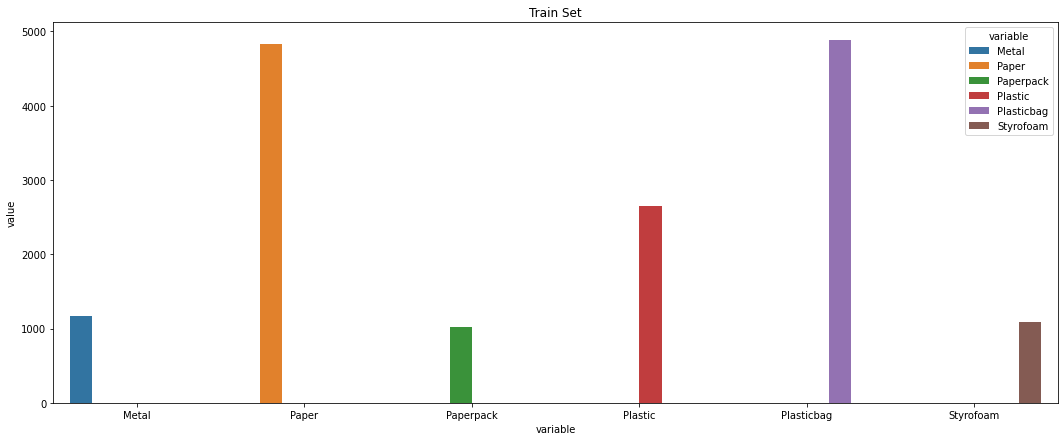

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,7))
sns.barplot(data = pd.DataFrame.from_dict([train_dataset_data]).melt(), x = "variable", y="value", hue="variable",  ax=axes).set_title('Train Set')

In [7]:
train_dataset_size = len(train_dataset)
train_dataset_indices = list(range(train_dataset_size))

In [8]:
np.random.shuffle(train_dataset_indices)
val_split_index = int(np.floor(0.8 * train_dataset_size))

In [9]:
train_idx, val_idx = train_dataset_indices[val_split_index:], train_dataset_indices[:val_split_index]
train_sampler = SubsetRandomSampler(train_idx)
train_loader = DataLoader(dataset=train_dataset, shuffle=False, batch_size=1, sampler=train_sampler)

In [10]:
def get_class_distribution_loaders(dataloader_obj, dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}
    
    for _,j in dataloader_obj:
        y_idx = j.item()
        y_lbl = idx2class[y_idx]
        count_dict[str(y_lbl)] += 1

    return count_dict

train_dataloader_data = get_class_distribution_loaders(train_loader, train_dataset)

Text(0.5, 1.0, 'Train Set')

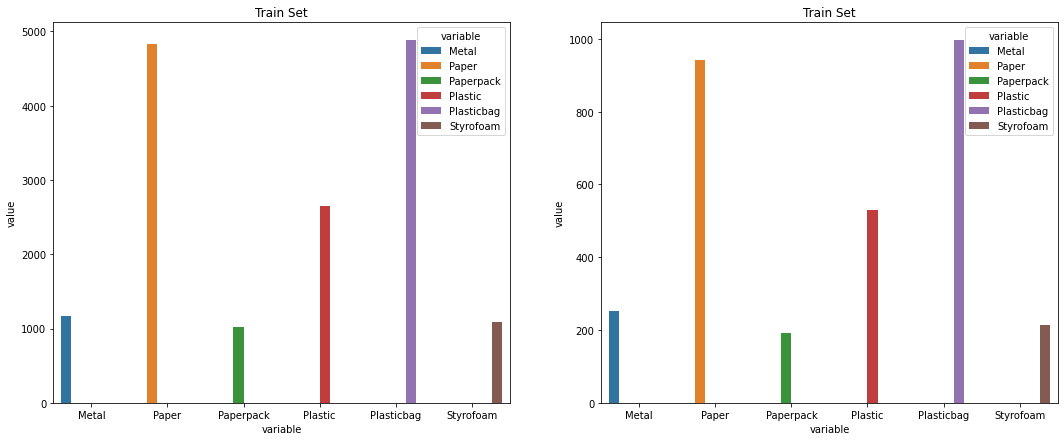

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,7))
sns.barplot(data = pd.DataFrame.from_dict([train_dataset_data]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Train Set')
sns.barplot(data = pd.DataFrame.from_dict([train_dataloader_data]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Train Set')

In [15]:
type(str(train_dataset_data))

str